# Tutorial:  Programmatic acces to the Gaia Archive.

**In this tutorial you will learn to:**

1. Access programmatically to the Gaia Archive
2. Examine all the catalogues that are available
3. Execute a simple ADQL query to retrieve a sample dataset
4. Use the pre-computed cross-matches hosted by the Archive to easily combine different catalogues.

Download and inspect different Archive products available for a selected sample centred in the brightest star of the Pleiades open cluster (Alcyone: R.A., Dec = 56.87125, 24.10493).


**Minimum requirements:**

* Jupyter Notebook
* Astropy
* Astroquery
* Numpy
* Matplotlib (optional)
* pyESASky (optional)




**Author(s):**

Héctor Cánovas (Hector.Canovas at esa.int), Telespazio UK for ESA.


**Related links**
* [Gaia Archive](https://gea.esac.esa.int/archive/)
* [Gaia Archive Help](https://www.cosmos.esa.int/web/gaia-users/archive)
* [Pre-computed Cross-matches tutorial](https://www.cosmos.esa.int/web/gaia-users/archive/combine-with-other-data#Sect_combine_precomputed_XM)
* [Astroquery.Gaia](https://astroquery.readthedocs.io/en/latest/gaia/gaia.html)
* [pyESASky](https://www.cosmos.esa.int/web/esdc/pyesasky)

In [1]:
! pip install astroquery

In [2]:
from astroquery.gaia import Gaia
from astropy.visualization import hist
import numpy as np
import matplotlib.pyplot as plt

#Optional: pyESASky (https://www.cosmos.esa.int/web/esdc/pyesasky)
load_esasky = True # poner False si se corre en Collab, ya que pyESASky no funcionará
if load_esasky:
    from pyesasky import ESASkyWidget
    from pyesasky import Catalogue
    from pyesasky.cooFrame   import CooFrame

In [3]:
# Dedicate functions ============

def make_canvas(title = '', xlabel = '', ylabel = '', show_grid = False, show_legend = False, fontsize = 12):
    ""
    "Generic function to simply the edition of plots"
    ""
    plt.title(title,    fontsize = fontsize)
    plt.xlabel(xlabel,  fontsize = fontsize)
    plt.ylabel(ylabel , fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    if show_grid:
        plt.grid()
    if show_legend:
        plt.legend(fontsize = fontsize)

## Login to the Gaia Archive

Update user name below as needed.

In [4]:
user_name = 'sortiz01'
Gaia.login(user = user_name) # Also: Gaia.login()

INFO: Login to gaia TAP server [astroquery.gaia.core]
Password: ········
OK
INFO: Login to gaia data server [astroquery.gaia.core]
OK


### Find out Available catalogues

In [6]:
tables = Gaia.load_tables(only_names=True, include_shared_tables=False)
print('')
list_tables = []
for table in (tables):
    tab_name = table.get_qualified_name()
    list_tables.append(tab_name)
    print(tab_name)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]

external.external.apassdr9
external.external.gaiadr2_astrophysical_parameters
external.external.gaiadr2_geometric_distance
external.external.gaiaedr3_distance
external.external.gaiaedr3_gcns_main_1
external.external.gaiaedr3_gcns_rejected_1
external.external.gaiaedr3_spurious
external.external.galex_ais
external.external.ravedr5_com
external.external.ravedr5_dr5
external.external.ravedr5_gra
external.external.ravedr5_on
external.external.sdssdr13_photoprimary
external.external.skymapperdr1_master
external.external.skymapperdr2_master
external.external.tmass_xsc
gaiadr1.gaiadr1.aux_qso_icrf2_match
gaiadr1.gaiadr1.ext_phot_zero_point
gaiadr1.gaiadr1.allwise_best_neighbour
gaiadr1.gaiadr1.allwise_neighbourhood
gaiadr1.gaiadr1.gsc23_best_neighbour
gaiadr1.gaiadr1.gsc23_neighbourhood
gaiadr1.gaiadr1.ppmxl_best_neighbour
gaiadr1.gaiadr1.ppmxl_nei

In [7]:
table_flag = user_name # try also: gaiaedr3; gaiadr2; gaiadr1; external

my_tables = [inp for inp in list_tables if table_flag in inp]
for my_tables in my_tables:
    print(my_tables)

user_sortiz01.user_sortiz01.c2d_oph
user_sortiz01.user_sortiz01.c2dtable
user_sortiz01.user_sortiz01.gaia_job
user_sortiz01.user_sortiz01.job
user_sortiz01.user_sortiz01.jobuploaded
user_sortiz01.user_sortiz01.m67_dr2
user_sortiz01.user_sortiz01.tabla
user_sortiz01.user_sortiz01.tabla2
user_sortiz01.user_sortiz01.tablaprueba
user_sortiz01.user_sortiz01.test_silva_villa
user_sortiz01.user_sortiz01.test_vizier_canovas
user_sortiz01.user_sortiz01.wrong_name


## Retrieve a sample dataset

The query below retrieves a 1-degree cone-search centred in Alcyone (brightest star of the Pleiades open cluster)

In [8]:
radius  = 0.5        # Degrees
inp_ra  = 56.87125   # Degrees
inp_dec = 24.10493   # Degrees

query = f"SELECT * FROM gaiaedr3.gaia_source \
WHERE 1=CONTAINS(POINT({inp_ra}, {inp_dec}),CIRCLE(ra, dec, {radius})) AND \
ruwe <1.4 AND parallax_over_error >10"

In [9]:
job     = Gaia.launch_job_async(query)
results = job.get_results()
print(f'Table size (rows): {len(results)}')
results[0:5]

INFO: Query finished. [astroquery.utils.tap.core]
Table size (rows): 1054


solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,phot_bp_rp_excess_factor,bp_rp,bp_g,g_rp,dr2_radial_velocity,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,deg,deg,deg,deg
int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float64,float64,float64,float64
1636042515805110273,Gaia EDR3 66500460412034688,66500460412034688,69127569,2016.0,57.27098636708921,0.17168145,23.767955076457387,0.11809423,3.0708693853753135,0.18191844,16.880472,25.453642,2.9765786103724174,0.22859785,-25.27900051237299,0.15374877,0.120883286,0.10213651,-0.07461291,0.095290996,0.03081684,0.06882435,0.57563007,0.12608166,-0.029562013,0.060510185,246,0,246,0,-1.0401708,230.71997,0.0,1.2945734e-15,31,False,1.2559012,--,--,--,--,--,--,--,28,16,0.31737956,32,7,0,0.017068248,109.671875,0,0,0.95163685,0.2662626,0.4525221,0.17325333,0.3482643,-14.721563,-7.873845,-11.949721,27.332169,False,269,1008.8968473907103,1.6505964,611.2317,18.17775,28,163.07987578574287,7.462535,21.853148,19.80754,28,1300.942977615704,11.199846,116.15722,16.96225,0,2,0,1,0,1.4511125,2.8452911,1.6297913,1.2154999,--,--,0,--,--,--,167.21027204162226,-23.456307317558043,60.27673597208111,3.6425886747222034
1636042515805110273,Gaia EDR3 66503037392413696,66503037392413696,1628250195,2016.0,57.25250999191082,0.0551229,23.76981116459022,0.03797768,1.085659938633454,0.05903795,18.389187,5.3446927,-4.784121236826631,0.0743591,-2.38

### Inspect results: Proper Motions

Pleiades sources are selected by filtering a circular area (radius = 3 mas) around the Pleiades proper motion distribution (center at ~ [+20,-50] mas/yr in [pmra, pmdec])

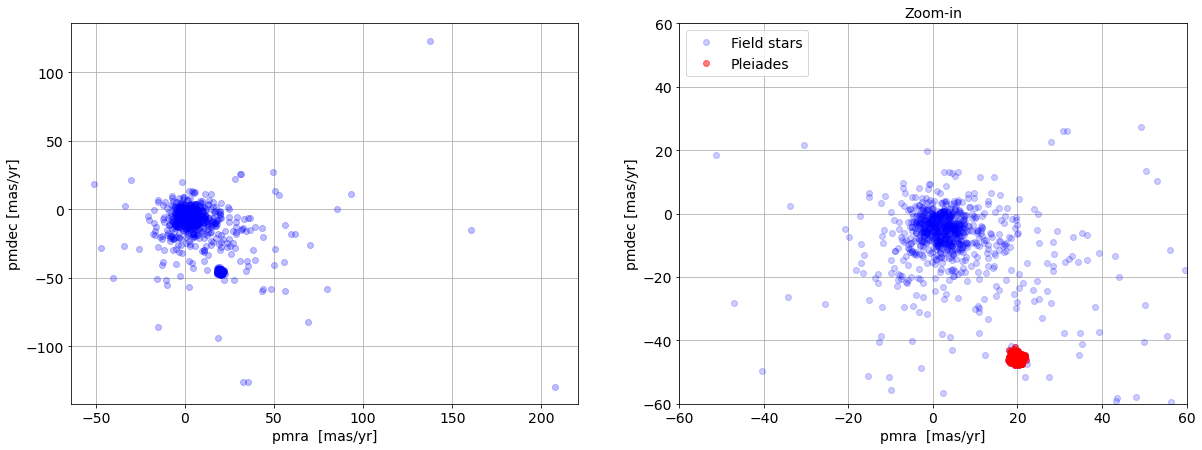

In [10]:
radius_pm = 3. # Radius applied to select Pleiades sample in the PMRA-PMDEC space
fontsize  = 14

fig     = plt.figure(figsize=[20,7])

# Panel 1 ===============
plt.subplot(121)
plt.plot(results['pmra'], results['pmdec'], 'bo', alpha = 0.25)
make_canvas(xlabel='pmra  [mas/yr]',ylabel='pmdec [mas/yr]', fontsize = fontsize, show_grid = True)

# Panel 2 ===============
plt.subplot(122)
plt.xlim([-60,60])
plt.ylim([-60,60])
plt.plot(results['pmra'], results['pmdec'], 'bo', alpha = 0.20, label = 'Field stars')

## Pleiades cluster: their proper motion distribution is clearly different from the background/foreground population (~25,-45):
els           = np.sqrt((results['pmra']-20)**2 + (results['pmdec']+45)**2) <radius_pm # Selected Pleiades sample
pleiades_samp = results[els]
plt.plot(pleiades_samp['pmra'], pleiades_samp['pmdec'], 'ro', alpha = 0.50, label = 'Pleiades')

make_canvas(title = 'Zoom-in', xlabel='pmra  [mas/yr]',ylabel='pmdec [mas/yr]', fontsize = fontsize, show_grid = True, show_legend = True)
plt.show()

In [11]:
pleiades_samp[0:5]

solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,phot_bp_rp_excess_factor,bp_rp,bp_g,g_rp,dr2_radial_velocity,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,deg,deg,deg,deg
int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float64,float64,float64,float64
1636042515805110273,Gaia EDR3 66506331628024832,66506331628024832,67044249,2016.0,57.3008750959372,0.030011289,23.886587601561303,0.017554495,7.417763214315631,0.032488454,228.31998,49.250324,19.620728847184104,0.04096634,-45.17323902020466,0.024343917,0.113543294,0.26993033,-0.14262232,-0.0077386843,-0.009412544,-0.008884138,0.5726318,0.123052575,-0.18759868,0.020545866,309,309,307,2,2.2740746,1102.5006,0.1692568,22.55602,31,False,1.6798116,--,--,--,--,--,--,--,35,16,0.056902774,38,7,0,0.0929082,87.60947,0,0,1.0928063,--,--,--,--,--,--,--,--,True,327,10821296.48979366,3852.067,2809.2183,8.101668,37,7177995.840941615,5706.914,1257.7719,8.198534,35,5473675.633429196,3489.503,1568.6118,7.902198,0,9,0,10,0,1.1691456,0.29633617,0.096865654,0.19947052,--,--,0,--,--,--,167.1443973788513,-23.3506361748743,60.32910074996654,3.7525457293892406
1636042515805110273,Gaia EDR3 66517468482370176,66517468482370176,288105999,2016.0,57.07512164513408,0.02081175,23.891273678457935,0.014940319,7.295109846533388,0.02168634,336.39194,49.208504,19.104444028563226,0.02612894,-45.3486188239001,0.018848723,-0.009619972,0.10226201,-0.3

### Inspect results: parallaxes

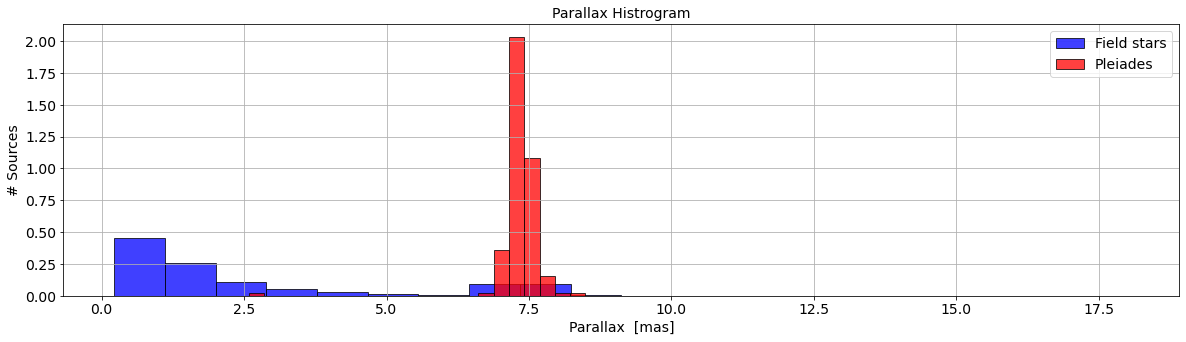

In [12]:
bins = 'scott' # Astropy.hist pre-selected histogram bins

fig = plt.figure(figsize = [20,5])

hist_out = hist(results['parallax'],       bins=bins, histtype='bar',alpha=0.75, density=True, edgecolor='black', linewidth=1, label = 'Field stars', color = 'b')
hist_out = hist(pleiades_samp['parallax'], bins=bins, histtype='bar',alpha=0.75, density=True, edgecolor='black', linewidth=1, label = 'Pleiades', color = 'r')
make_canvas(title = 'Parallax Histrogram', xlabel=f'Parallax  [{results["parallax"].unit}]',ylabel='# Sources', fontsize = fontsize, show_grid = True, show_legend = True)
plt.show()

### Optional: Visualise results with pyESASky

In [13]:
if load_esasky:
    esasky = ESASkyWidget()
    display(esasky)
    
    catalogue_field    = Catalogue(catalogueName='field',    cooframe=CooFrame.FRAME_J2000, color = 'blue', lineWidth=2)
    catalogue_pleiades = Catalogue(catalogueName='pleiades', cooframe=CooFrame.FRAME_J2000, color = 'red',  lineWidth=2)

    for ii in range(len(results)):
        catalogue_field.addSource(results['source_id'][ii], results['ra'][ii], results['dec'][ii], ii + 1, [], [])

    for ii in range(len(pleiades_samp)):
        catalogue_pleiades.addSource(pleiades_samp['source_id'][ii], pleiades_samp['ra'][ii], pleiades_samp['dec'][ii], ii + 1, [], [])    
    # esasky.overlayCatalogueWithDetails(catalogue_field)
    # esasky.overlayCatalogueWithDetails(catalogue_pleiades)

ESASkyWidget(layout=Layout(align_self='stretch', height='400px'))

## Upload selected (Pleiades) sample to the Archive user space

In [15]:
#Gaia.delete_user_table(f'user_{user_name}.pleiades_test') # si usted no tiene esta tabla de usuario, comentar esta linea
Gaia.upload_table(upload_resource=pleiades_samp, table_name='pleiades_test')

Sending pytable.


Uploaded table 'pleiades_test'.


### Verify that the table is stored in my user space

In [17]:
tables = Gaia.load_tables(only_names=True, include_shared_tables=False)
print('')
list_tables = []
for table in (tables):
    tab_name = table.get_qualified_name()
    list_tables.append(tab_name)

    
table_flag = user_name

my_tables = [inp for inp in list_tables if table_flag in inp]
for my_tables in my_tables:
    print(my_tables)    

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]

user_sortiz01.user_sortiz01.c2d_oph
user_sortiz01.user_sortiz01.c2dtable
user_sortiz01.user_sortiz01.gaia_job
user_sortiz01.user_sortiz01.job
user_sortiz01.user_sortiz01.jobuploaded
user_sortiz01.user_sortiz01.m67_dr2
user_sortiz01.user_sortiz01.pleiades_test
user_sortiz01.user_sortiz01.tabla
user_sortiz01.user_sortiz01.tabla2
user_sortiz01.user_sortiz01.tablaprueba
user_sortiz01.user_sortiz01.test_silva_villa
user_sortiz01.user_sortiz01.test_vizier_canovas
user_sortiz01.user_sortiz01.wrong_name


## Run a Cross-match to 2MASS PSC catalogue to retrieve IR photometry

In [18]:
query = f'SELECT gaia.source_id, gaia.ra, gaia.dec, gaia.parallax, gaia.pmra, gaia.pmdec, gaia.phot_g_mean_mag, gaia.phot_bp_mean_mag, gaia.phot_rp_mean_mag, \
xmatch.original_ext_source_id, xmatch.clean_tmass_psc_xsc_oid, xmatch.angular_distance, \
tmass.tmass_oid, tmass.designation, tmass.j_m, tmass.h_m, tmass.ks_m \
FROM user_{user_name}.pleiades_test AS gaia \
JOIN gaiaedr3.tmass_psc_xsc_best_neighbour AS xmatch USING (source_id) \
JOIN gaiaedr3.tmass_psc_xsc_join AS xjoin \
   ON xmatch.original_ext_source_id = xjoin.original_psc_source_id \
JOIN gaiadr1.tmass_original_valid AS tmass \
   ON xjoin.original_psc_source_id = tmass.designation \
ORDER BY gaia.dec ASC'

In [19]:
job_2     = Gaia.launch_job_async(query)
results_2 = job_2.get_results()
print(f'Table size (rows): {len(results_2)}')
results_2[0:5]

INFO: Query finished. [astroquery.utils.tap.core]
Table size (rows): 160


source_id,ra,dec,parallax,pmra,pmdec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,original_ext_source_id,clean_tmass_psc_xsc_oid,angular_distance,tmass_oid,designation,j_m,h_m,ks_m
,deg,deg,mas,mas / yr,mas / yr,mag,mag,mag,,,arcsec,,,mag,mag,mag
int64,float64,float64,float64,float64,float64,float32,float32,float32,object,int32,float32,int64,object,float32,float32,float32
65005262035285888,56.76583191330965,23.616114992542006,7.209191094463601,20.780047946237538,-44.242085995364654,14.2646475,15.604331,13.129026,03470376+2336588,362830778,0.091169186,362801206,03470376+2336588,11.499,10.824,10.591
65005846150835200,56.86159637689897,23.633878170833444,7.203188984556041,19.562190919181592,-43.405458911462645,16.335794,18.170729,15.042625,03472676+2338027,362879901,0.07497366,362850319,03472676+2338027,13.157,12.573,12.282
65008388771477120,56.71926880123131,23.645138846504032,7.263568493862063,19.341465818406746,-45.10348228374381,16.497435,18.41301,15.17908,03465259+2338433,362911041,0.109805755,362881461,03465259+2338433,13.191,12.456,12.206
65000073712701056,57.01950344317138,23.658221984566293,7.061613568569041,19.143649354954604,-44.93870161163164,19.53008,21.417053,17.984467,03480465+2339303,362946948,0.033621036,362917359,03480465+2339303,15.336,14.573,14.226
65000417312240896,57.04676066618868,23.66195219778092,7.2799358540794135,19.68836366974725,-45.0455575658892,15.711198,16.785028,14.390324,03481120+2339438,362957206,0.13954169,362927623,03481120+2339438,12.74,12.113,11.898


In [20]:
results_2.write('pleiades_gaia_twomass.vot', format = 'votable', overwrite = True)